In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [63]:
df=pd.read_csv("Final_car")

In [64]:
df

,Unnamed: 0,Fuel Type,Body Type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats,Color,City
0,0,4,2,1,3,19,131,2015,4.00,5,120000,23.10,998,5,126,0
1,1,4,7,1,2,6,40,2018,8.11,2,32706,17.00,1497,5,126,0
2,2,4,2,1,1,27,220,2018,5.85,2,11949,23.84,1199,5,101,0
3,3,4,8,1,1,9,76,2014,4.62,2,17794,19.10,1197,5,79,0
4,4,1,7,1,1,19,149,2015,7.90,5,60000,23.65,1248,5,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,7435,4,2,1,1,19,131,2022,5.10,5,10000,25.24,998,5,79,5
7436,7436,4,2,1,1,19,126,2014,1.80,5,120000,22.74,796,5,79,5
7437,7437,4,8,0,3,20,163,2011,5.50,5,50000,11.74,1796,5,79,5
7438,7438,4,2,1,1,19,146,2012,1.40,5,40000,18.50,1197,5,79,5


In [65]:
X=df.drop(columns="price")
Y=df["price"]

In [66]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [67]:
algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor,GradientBoostingRegressor]

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Traing and Testing Score : <class 'sklearn.linear_model._base.LinearRegression'>
Training Score for 0.6494076040135208


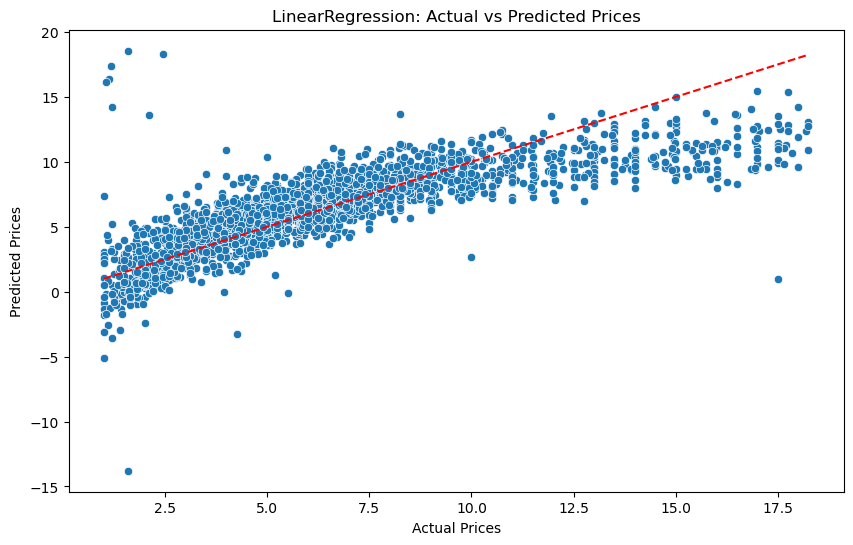

Traing and Testing Score : <class 'sklearn.tree._classes.DecisionTreeRegressor'>
Training Score for 1.0


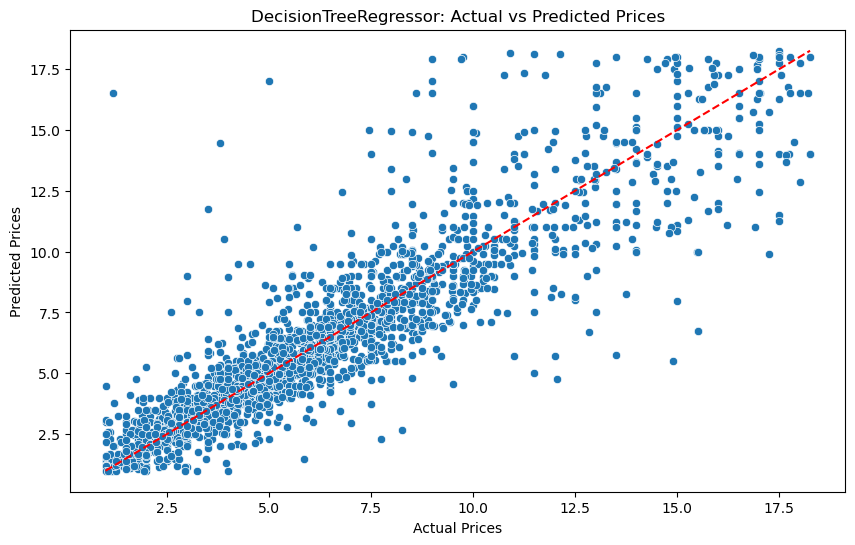

Traing and Testing Score : <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Training Score for 0.9828419973372747


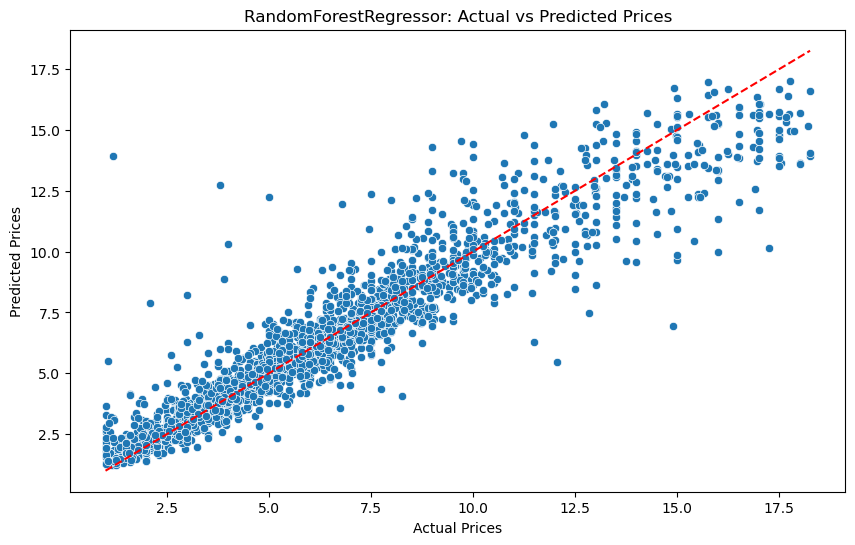

Traing and Testing Score : <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
Training Score for 0.8829083827108192


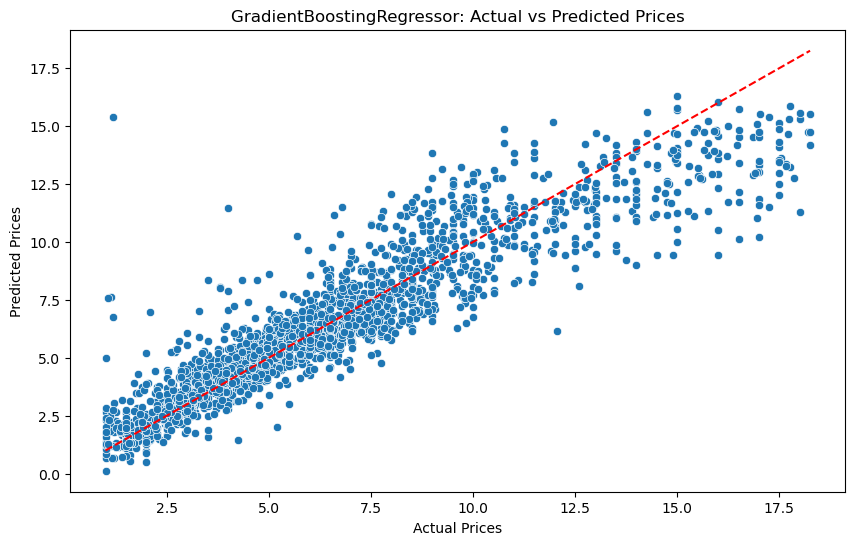

In [69]:
l=[]
for alg in algorithms:
    model=alg().fit(x_train,y_train)
    y_pred=model.predict(x_test)
    MSE=mean_squared_error(y_test,y_pred)
    RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
    r_squr=r2_score(y_test,y_pred)
    l.append({"model": type(model).__name__,
                                          "MSE": MSE,
                                          "RMSE": RMSE,
                                           "R2": r_squr})
    print("Traing and Testing Score :",alg)
    print("Training Score for",model.score(x_train,y_train))
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{type(model).__name__}: Actual vs Predicted Prices')
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--')  # Add reference line
    plt.show()
df_result=pd.DataFrame(l)

    

In [70]:
df_result

,model,MSE,RMSE,R2
0,LinearRegression,4.914159,2.216790,0.637862
1,DecisionTreeRegressor,2.831684,1.682761,0.791326
2,RandomForestRegressor,1.505865,1.227137,0.889029
3,GradientBoostingRegressor,2.008160,1.417096,0.852013


# Hyperparameter Tuning

In [72]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 
    'n_estimators' : [100, 150, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False] 
}

In [73]:
grid_tuning=RandomizedSearchCV(estimator=RandomForestRegressor(),
                            param_distributions=param_grid, cv=5, n_jobs=-1)

grid_tuning.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300]})

In [74]:
grid_tuning.best_params_,

({'n_estimators': 300,
  'min_samples_split': 2,
  'min_samples_leaf': 4,
  'max_features': 'sqrt',
  'max_depth': None,
  'bootstrap': False},)

In [75]:
# final model fit and prediction
final_model=RandomForestRegressor(n_estimators=300,max_features="sqrt",max_depth=30,min_samples_leaf=1,
                                  min_samples_split=5,random_state=42)

final_model.fit(x_train,y_train)

#Model evaluation
y_pred_fm=final_model.predict(x_test)
MSE_fm=mean_squared_error(y_test,y_pred_fm)
RMSE_fm=np.sqrt(mean_squared_error(y_test,y_pred_fm))
r_squr_fm=r2_score(y_test,y_pred_fm)

print(f"Trainscore: {final_model.score(x_train, y_train)}")
print(f"Testscore: {final_model.score(x_test, y_test)}")

# create dataframe to view above evaluation metrics
rf_1=pd.DataFrame({"model":"RandomForestRegressor","MSE":[MSE_fm],"RMSE":[RMSE_fm],"R2":r_squr_fm})
rf_1

Trainscore: 0.9650018050537286
Testscore: 0.8806380637674095


,model,MSE,RMSE,R2
0,RandomForestRegressor,1.619726,1.272684,0.880638


In [76]:
import pickle

In [77]:
with open("Final_model.pkl","wb") as f:
    pickle.dump(final_model,f)